# Data Process Procedure

### Clean Data
* Eliminate erroneous observations
* Eliminate un-needed columns
* Sort by date, time, and tripid
* Convert timepointid from numerical to alphabetical
* Convert seconds to minutes
* Convert calendarid to python datetime format and add time

In [6]:
import pandas as pd
import numpy as np
from pandas import *

raw_data = pd.read_csv('/Users/Danny1/Documents/Northeastern/MBTA Route 1 Analysis/1_Raw Data/adherence-01.csv')

Route_1 = raw_data[['calendarid','tripid','routedirectionid','timepointid','scheduledtime','actualarrivaltime','actualdeparturetime']]
Route_1 = Route_1.drop_duplicates(['calendarid','tripid','timepointid'])
Route_1 = Route_1.dropna(subset = ['actualarrivaltime'])
Route_1 = Route_1.dropna(subset = ['tripid'])
Route_1 = Route_1.replace({'timepointid' :{1 :'A', 6 :'B', 4 :'C', 206 :'D', 350 :'E', 213 :'F', 158 :'G', 495 :'H', 181 :'I'}})
Route_1 = Route_1.replace({'routedirectionid' :{3 :'inbound', 4 :'outbound'}})
Route_1['calendarid'] = Route_1['calendarid']-100000000
Route_1['scheduledtime'] = (Route_1['scheduledtime']/60)
Route_1['actualarrivaltime'] = (Route_1['actualarrivaltime']/60)
Route_1['actualdeparturetime'] = (Route_1['actualdeparturetime']/60)
Route_1['calendarid'] = pd.to_datetime(Route_1['calendarid'], format= '%Y%m%d')
Route_1['calendarid'] = pd.to_datetime(Route_1['calendarid']) + pd.to_timedelta(Route_1['actualarrivaltime'],unit='m')
Route_1 = Route_1.sort(['calendarid','tripid'])
Route_1 = Route_1.reset_index()
Route_1 = Route_1.drop(['index'],axis=1)
Route_1 = Route_1.set_index(['calendarid'])
Route_1.to_csv('Route01_Cleaned.csv')
Route_1.head(10)

,tripid,routedirectionid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime
calendarid,,,,,,
2014-01-01 05:52:31.999979999,4225920,outbound,A,360,352.533333,360.066667
2014-01-01 06:00:28.000020000,4225920,outbound,B,361,360.466667,360.700000
2014-01-01 06:04:34.000020000,4225920,outbound,C,364,364.566667,365.283333
2014-01-01 06:06:49.000020000,4225920,outbound,D,366,366.816667,367.350000
2014-01-01 06:08:42.000000000,4225217,inbound,I,370,368.700000,369.883333
2014-01-01 06:09:55.999980000,4225920,outbound,E,370,369.933333,370.483333
2014-01-01 06:12:07.999980000,4225920,outbound,F,373,372.133333,372.283333
2014-01-01 06:12:37.000020000,4225217,inbound,H,373,372.616667,372.850000
2014-01-01 06:13:54.000000000,4225920,outbound,G,378,373.900000,375.216667


### Select observations for analysis
* Select observations from April 2014
* Select inbound observations from Harvard Square(I) to MIT (F)
* Sort data by time and trip

In [5]:
import pandas as pd
import numpy as np
from pandas import *

Route01_Cleaned = pd.read_csv('Route01_Cleaned.csv')
Route01_Cleaned['calendarid'] = pd.to_datetime(Route01_Cleaned['calendarid'])
Route01_Cleaned = Route01_Cleaned.set_index(['calendarid'])

desired = [('2014-04-01','2014-05-01')]

Route_1_Apr14_IB = pd.DataFrame()

for (start, stop) in desired:
    selection = Route01_Cleaned[(Route01_Cleaned.index >= pd.Timestamp(start)) & 
        (Route01_Cleaned.index <= pd.Timestamp(stop))]
    Route_1_Apr14_IB = Route_1_Apr14_IB.append(selection)
    
Route_1_Apr14_IB = Route_1_Apr14_IB.reset_index()

temp = pd.DatetimeIndex(Route_1_Apr14_IB['calendarid'])
Route_1_Apr14_IB['date'] = temp.date
Route_1_Apr14_IB['time'] = temp.time
del Route_1_Apr14_IB['calendarid']
Route_1_Apr14_IB = Route_1_Apr14_IB[Route_1_Apr14_IB.routedirectionid != 'outbound']
Route_1_Apr14_IB = Route_1_Apr14_IB.sort(['date','tripid','time'])
Route_1_Apr14_IB = Route_1_Apr14_IB[Route_1_Apr14_IB['timepointid'] != 'A']
Route_1_Apr14_IB = Route_1_Apr14_IB[Route_1_Apr14_IB['timepointid'] != 'B']
Route_1_Apr14_IB = Route_1_Apr14_IB[Route_1_Apr14_IB['timepointid'] != 'C']
Route_1_Apr14_IB = Route_1_Apr14_IB[Route_1_Apr14_IB['timepointid'] != 'D']
Route_1_Apr14_IB = Route_1_Apr14_IB[Route_1_Apr14_IB['timepointid'] != 'E']
Route_1_Apr14_IB = Route_1_Apr14_IB.reset_index()
Route_1_Apr14_IB = Route_1_Apr14_IB.drop(['index'],axis=1)
#Route_1_Apr14_IB.to_csv('test.csv')

i_time = Route_1_Apr14_IB[['tripid', 'time']][Route_1_Apr14_IB['timepointid'] == 'I'].set_index('tripid')
Route_1_Apr14_IB = Route_1_Apr14_IB.join(i_time, on=('tripid'), rsuffix='I')
Route_1_Apr14_IB = Route_1_Apr14_IB.drop_duplicates(['tripid','timepointid','time'])
Route_1_Apr14_IB = Route_1_Apr14_IB.sort(['date','timeI'])
Route_1_Apr14_IB = Route_1_Apr14_IB.reset_index()
Route_1_Apr14_IB = Route_1_Apr14_IB.drop(['index'],axis=1)
del Route_1_Apr14_IB['routedirectionid']
del Route_1_Apr14_IB['timeI']
Route_1_Apr14_IB = Route_1_Apr14_IB.replace({'timepointid' :{ 'I' : '1-Harvard Square', 'H' : '2-Auburn/Putnam' , 'G' : '3-Mass/Pearl', 'F' : '4-MIT'}})
Route_1_Apr14_IB.head(10)

,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,date,time
0,4294079,1-Harvard Square,1457,1444.966667,1454.350000,2014-04-01,00:04:58.000020
1,4294079,2-Auburn/Putnam,1460,1457.916667,1458.166667,2014-04-01,00:17:55.000020
2,4294079,3-Mass/Pearl,1463,1460.250000,1460.816667,2014-04-01,00:20:15
3,4294079,4-MIT,1467,1465.183333,1466.116667,2014-04-01,00:25:10.999980
4,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2014-04-01,00:22:24
5,4293412,2-Auburn/Putnam,1473,1472.933333,1473.116667,2014-04-01,00:32:55.999980
6,4293412,3-Mass/Pearl,1476,1475.500000,1476.166667,2014-04-01,00:35:30
7,4293412,4-MIT,1480,1481.450000,1482.383333,2014-04-01,00:41:27
8,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2014-04-01,00:44:40.999980
9,4293511,2-Auburn/Putnam,1499,1487.983333,1488.200000,2014-04-01,00:47:58.999980


### Calculate total travel time and individual link travel time
* Create column for travel time between each stop
* Create column for total travel time for each trip

In [6]:
Route_1_Apr14_IB['linktraveltime'] = Route_1_Apr14_IB['actualdeparturetime'] - Route_1_Apr14_IB['actualarrivaltime'].shift(-1)
Route_1_Apr14_IB['linktraveltime'] = Route_1_Apr14_IB['linktraveltime'].abs()
Route_1_Apr14_IB[['linktraveltime']] = Route_1_Apr14_IB[['linktraveltime']].astype(object)
Route_1_Apr14_IB['linktraveltime'][Route_1_Apr14_IB.timepointid.str.contains('2-Auburn/Putnam')] = np.nan
Route_1_Apr14_IB['linktraveltime'][Route_1_Apr14_IB.timepointid.str.contains('3-Mass/Pearl')] = np.nan
Route_1_Apr14_IB['linktraveltime'][Route_1_Apr14_IB.timepointid.str.contains('4-MIT')] = np.nan
Route_1_Apr14_IB['totaltraveltime'] = Route_1_Apr14_IB['actualdeparturetime'] - Route_1_Apr14_IB['actualarrivaltime'].shift(-3)
Route_1_Apr14_IB[['totaltraveltime']] = Route_1_Apr14_IB[['totaltraveltime']].astype(object)
Route_1_Apr14_IB['totaltraveltime'] = Route_1_Apr14_IB['totaltraveltime'].abs()
Route_1_Apr14_IB['totaltraveltime'][Route_1_Apr14_IB.timepointid.str.contains('2-Auburn/Putnam')] = np.nan
Route_1_Apr14_IB['totaltraveltime'][Route_1_Apr14_IB.timepointid.str.contains('3-Mass/Pearl')] = np.nan
Route_1_Apr14_IB['totaltraveltime'][Route_1_Apr14_IB.timepointid.str.contains('4-MIT')] = np.nan
Route_1_Apr14_IB.head(50)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,date,time,linktraveltime,totaltraveltime
0,4294079,1-Harvard Square,1457,1444.966667,1454.350000,2014-04-01,00:04:58.000020,3.566667,10.83333
1,4294079,2-Auburn/Putnam,1460,1457.916667,1458.166667,2014-04-01,00:17:55.000020,NaN,NaN
2,4294079,3-Mass/Pearl,1463,1460.250000,1460.816667,2014-04-01,00:20:15,NaN,NaN
3,4294079,4-MIT,1467,1465.183333,1466.116667,2014-04-01,00:25:10.999980,NaN,NaN
4,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2014-04-01,00:22:24,2.666667,11.18333
5,4293412,2-Auburn/Putnam,1473,1472.933333,1473.116667,2014-04-01,00:32:55.999980,NaN,NaN
6,4293412,3-Mass/Pearl,1476,1475.500000,1476.166667,2014-04-01,00:35:30,NaN,NaN
7,4293412,4-MIT,1480,1481.450000,1482.383333,2014-04-01,00:41:27,NaN,NaN
8,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2014-04-01,00:44:40.999980,2.816667,9.3
9,4293511,2-Auburn/Putnam,1499,1487.983333,1488.200000,2014-04-01,00:47:58.999980,NaN,NaN


### Calculate first link ratio
* Create day of week column
* Calculate mean of each day for first link travel time (Harvard Square to Auburn/Putnam)
* Create column for first total travel time ratio

In [15]:
Route_1_Apr14_IB['day'] = pd.DatetimeIndex(Route_1_Apr14_IB['date']).weekday
Route_1_Apr14_IB[['linktraveltime']] = Route_1_Apr14_IB[['linktraveltime']].astype(float)
Route_1_Apr14_IB = Route_1_Apr14_IB[(Route_1_Apr14_IB['linktraveltime'] <= 150)]
day_mean = Route_1_Apr14_IB.groupby(['day']).mean()
del day_mean['tripid']
del day_mean['scheduledtime']
del day_mean['actualarrivaltime']
del day_mean['actualdeparturetime']
Route_1_Apr14_IB = Route_1_Apr14_IB.join(day_mean, on=('day'), rsuffix='mean')
Route_1_Apr14_IB['linkratio'] = Route_1_Apr14_IB['linktraveltime']/Route_1_Apr14_IB['linktraveltimemean']
Route_1_Apr14_IB.to_csv('Route01_TravelTime.csv')
Route_1_Apr14_IB.head(10)

,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,date,time,linktraveltime,totaltraveltime,day,linktraveltimemean,linkratio
0,4294079,1-Harvard Square,1457,1444.966667,1454.350000,2014-04-01,00:04:58.000020,3.566667,10.83333,1,4.748373,0.751134
4,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2014-04-01,00:22:24,2.666667,11.18333,1,4.748373,0.561596
8,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2014-04-01,00:44:40.999980,2.816667,9.3,1,4.748373,0.593186
12,4308494,1-Harvard Square,1510,1499.650000,1526.333333,2014-04-01,00:59:39,2.833333,9.2,1,4.748373,0.596696
16,4292837,1-Harvard Square,310,299.083333,311.666667,2014-04-01,04:59:04.999980,5.000000,11.4,1,4.748373,1.052992
20,4293722,1-Harvard Square,330,328.583333,330.050000,2014-04-01,05:28:34.999980,3.066667,10.56667,1,4.748373,0.645835
24,4294055,1-Harvard Square,350,341.933333,350.366667,2014-04-01,05:41:55.999980,4.033333,11.65,1,4.748373,0.849414
28,4293030,1-Harvard Square,366,359.683333,364.650000,2014-04-01,05:59:40.999980,3.566667,9.866667,1,4.748373,0.751134
32,4292839,1-Harvard Square,381,376.783333,381.616667,2014-04-01,06:16:46.999980,4.483333,12.85,1,4.748373,0.944183
36,4293724,1-Harvard Square,395,394.866667,396.200000,2014-04-01,06:34:52.000020,3.733333,11.16667,1,4.748373,0.786234


### Plot link travel time and total travel time distributions
* Create bar plot for link travel time to identify how the data is distributed
* Create bar plot for total travel time to identify how the data is distributed

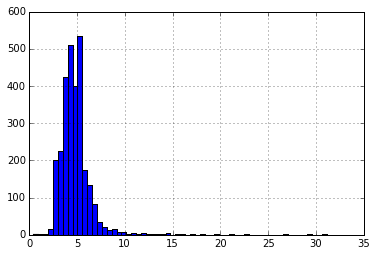

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
from pandas import *
%matplotlib inline

Route01_TravelTime = pd.read_csv('Route01_TravelTime.csv')
Route01_TravelTime = Route01_TravelTime[Route01_TravelTime.timepointid != '2-Auburn/Putnam']
Route01_TravelTime = Route01_TravelTime[Route01_TravelTime.timepointid != '3-Mass/Pearl']
Route01_TravelTime = Route01_TravelTime[Route01_TravelTime.timepointid != '4-MIT']
del Route01_TravelTime['Unnamed: 0']
del Route01_TravelTime['scheduledtime']
del Route01_TravelTime['tripid']
Route01_TravelTime = Route01_TravelTime.reset_index()
Route01_TravelTime = Route01_TravelTime.drop(['index'],axis=1)
Route01_TravelTime = Route01_TravelTime.replace({'timepointid' :{ '1-Harvard Square' : 'HavardSquare-MIT'}})
Route01_TravelTime = Route01_TravelTime[(Route01_TravelTime['totaltraveltime'] <= 200)]
plt.figure();
Route01_TravelTime['linktraveltime'].hist(bins=60)

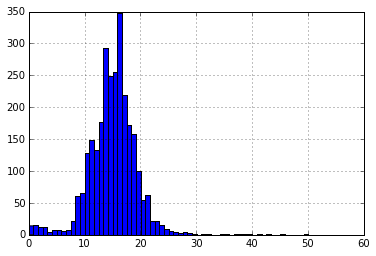

In [37]:
plt.figure();
Route01_TravelTime['totaltraveltime'].hist(bins=60)

### Wrangle Historical Weather Data from Weather Underground API
* Define start and end dates to wrangle from weather underground
* Create for loop which iterates through the days and appends weather data to a dataframe
* Select weather features
* Create csv file of weather data

In [7]:
import pandas as pd
import urllib2, json, time, sys
from datetime import date, datetime
from dateutil.rrule import rrule, DAILY

df = pd.DataFrame([])

token = '430dbd2fbd101264'
start = '2014-04-01'
end = '2014-04-30'


start = datetime.strptime(start,'%Y-%m-%d')
end = datetime.strptime(end,'%Y-%m-%d')

url = ""

if end < start:
    print "Error: end date " + str(end) + " occurs before start date " + str(start)
    sys.exit()
    

for dt in rrule(DAILY, dtstart=start, until=end):

    wunderground_url ="http://api.wunderground.com/api/" + token + "/history_" + dt.strftime("%Y%m%d") +"/q/MA/Boston.json"

    try:
        url = urllib2.urlopen(wunderground_url)
        parsed_json = json.loads(url.read())
    except:
        print "Error reading URL " + wunderground_url
        print "Is your token correct?"
        url.close()
        sys.exit()


    temp = parsed_json['history']['dailysummary'][0]['meantempi']
    rain = parsed_json['history']['dailysummary'][0]['rain']
    snow = parsed_json['history']['dailysummary'][0]['snow']
    hail = parsed_json['history']['dailysummary'][0]['hail']
    snowfall = parsed_json['history']['dailysummary'][0]['snowfalli']
    precip = parsed_json['history']['dailysummary'][0]['precipi']
    
    data = pd.DataFrame([[dt.strftime("%Y-%m-%d"), temp, rain, snow, hail, snowfall, precip]])
    df = df.append(data)
    url.close()
    
df.columns = ['Date','mean_temp','rain','snow','hail','snowfall','precip' ]
df.to_csv('weather_data.csv')

### Merge Weather Data
* Merge datasets using pandas merge
* Sort by date and time
* Drop un-needed columns and reset index

In [74]:
import pandas as pd

weather = pd.read_csv('weather_data.csv')
traveltime = pd.read_csv('Route01_TravelTime.csv')
Route01_traveltime_weather = pd.merge(left=traveltime,right=weather, left_on='date', right_on='Date')
Route01_traveltime_weather = Route01_traveltime_weather.sort(['date','time'])
Route01_traveltime_weather = Route01_traveltime_weather.drop(['Unnamed: 0_y','Unnamed: 0_x'],axis=1)
Route01_traveltime_weather = Route01_traveltime_weather.reset_index()
Route01_traveltime_weather = Route01_traveltime_weather.drop(['index'],axis=1)
Route01_traveltime_weather = Route01_traveltime_weather.replace({'precip' :{'T' :.01}})
Route01_traveltime_weather = Route01_traveltime_weather[['date','time','tripid','timepointid','scheduledtime','actualarrivaltime','actualdeparturetime','linktraveltime','totaltraveltime','day','linktraveltimemean','linkratio','mean_temp','rain','snow','hail','snowfall','precip']]
Route01_traveltime_weather.to_csv('Route01_traveltime_weather.csv')
Route01_traveltime_weather.head(10)

,date,time,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,linktraveltime,totaltraveltime,day,linktraveltimemean,linkratio,mean_temp,rain,snow,hail,snowfall,precip
0,2014-04-01,00:04:58.000020,4294079,1-Harvard Square,1457,1444.966667,1454.350000,3.566667,10.833333,1,4.748373,0.751134,41,0,0,0,0,0.00
1,2014-04-01,00:22:24,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2.666667,11.183333,1,4.748373,0.561596,41,0,0,0,0,0.00
2,2014-04-01,00:44:40.999980,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2.816667,9.300000,1,4.748373,0.593186,41,0,0,0,0,0.00
3,2014-04-01,00:59:39,4308494,1-Harvard Square,1510,1499.650000,1526.333333,2.833333,9.200000,1,4.748373,0.596696,41,0,0,0,0,0.00
4,2014-04-01,04:59:04.999980,4292837,1-Harvard Square,310,299.083333,311.666667,5.000000,11.400000,1,4.748373,1.052992,41,0,0,0,0,0.00
5,2014-04-01,05:28:34.999980,4293722,1-Harvard Square,330,328.583333,330.050000,3.066667,10.566667,1,4.748373,0.645835,41,0,0,0,0,0.00
6,2014-04-01,05:41:55.999980,4294055,1-Harvard Square,350,341.933333,350.366667,4.033333,11.650000,1,4.748373,0.849414,41,0,0,0,0,0.00
7,2014-04-01,05:59:40.999980,4293030,1-Harvard Square,366,359.683333,364.650000,3.566667,9.866667,1,4.748373,0.751134,41,0,0,0,0,0.00
8,2014-04-01,06:16:46.999980,4292839,1-Harvard Square,381,376.783333,381.616667,4.483333,12.850000,1,4.748373,0.944183,41,0,0,0,0,0.00
9,2014-04-01,06:34:52.000020,4293724,1-Harvard Square,395,394.866667,396.200000,3.733333,11.166667,1,4.748373,0.786234,41,0,0,0,0,0.00


### Merge Red Sox Data
* Combine Date and Time for a single index to merge
* Write function to find closest red sox game
* Create column indicating 1 if bus departs within 1 hour of red sox game

In [11]:
import pandas as pd
import numpy as np
import datetime as dt

Route01_data = pd.read_csv('Route01_traveltime_weather.csv',parse_dates = [[1,2]])
red_sox = pd.read_csv('redsox_schedule2014.csv', parse_dates = [[0,1]])
Route01_data = Route01_data.rename(columns={'Unnamed: 0_date': 'date'})
red_sox = red_sox[red_sox.location != '@']
red_sox['date_time'] = red_sox['date_time'] + dt.timedelta(hours=12)
del red_sox['location']
del Route01_data['Unnamed: 0']
red_sox = red_sox.reset_index()
del red_sox['attendance']
del red_sox['index']

def find_closest_date(timepoint, time_series, add_time_delta_column=True):
    # takes a pd.Timestamp() instance and a pd.Series with dates in it
    # calcs the delta between `timepoint` and each date in `time_series`
    # returns the closest date and optionally the number of days in its time delta
    deltas = (time_series - timepoint)
    idx_closest_date = np.argmin(deltas)
    res = {"closest_date": time_series.ix[idx_closest_date]}
    idx = ['closest_date']
    if add_time_delta_column:
        res["closest_delta"] = deltas[idx_closest_date]
        idx.append('closest_delta')
    return pd.Series(res, index=idx)

Route01_data[['closest', 'time_bt_x_and_y']] = Route01_data.date_time.apply(
                                          find_closest_date, args=[red_sox.date_time])

Route01_data_redsox = pd.merge(Route01_data, red_sox, left_on=['closest'], right_on=['date_time'])

red_sox_game = []

for row in Route01_data_redsox['time_bt_x_and_y']:
    if row <= dt.timedelta(minutes = 30) and row >= dt.timedelta(minutes = -10):
        red_sox_game.append(1)
    else: 
        if row >= dt.timedelta(minutes = 170) and row <= dt.timedelta(minutes = 190):
            red_sox_game.append(1)
        else:
            red_sox_game.append(0)
                                                                 
Route01_data_redsox['red_sox_game'] = red_sox_game
del Route01_data_redsox['redsox_game']
del Route01_data_redsox['date_time_y']
Route01_data_redsox.to_csv('Route01_data_redsox_weather.csv')
Route01_data_redsox.head(50)

,date_time_x,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,linktraveltime,totaltraveltime,day,linktraveltimemean,linkratio,mean_temp,rain,snow,hail,snowfall,precip,closest,time_bt_x_and_y,red_sox_game
0,2014-04-01 00:04:58.000020,4294079,1-Harvard Square,1457,1444.966667,1454.350000,3.566667,10.833333,1,4.748373,0.751134,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 15:14:01.999980,0
1,2014-04-01 00:22:24.000000,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2.666667,11.183333,1,4.748373,0.561596,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:56:36,0
2,2014-04-01 00:44:40.999980,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2.816667,9.300000,1,4.748373,0.593186,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:34:19.000020,0
3,2014-04-01 00:59:39.000000,4308494,1-Harvard Square,1510,1499.650000,1526.333333,2.833333,9.200000,1,4.748373,0.596696,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:19:21,0
4,2014-04-01 04:59:04.999980,4292837,1-Harvard Square,310,299.083333,311.666667,5.000000,11.400000,1,4.748373,1.052992,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 10:19:55.000020,0
5,2014-04-01 05:28:34.999980,4293722,1-Harvard Square,330,328.583333,330.050000,3.066667,10.566667,1,4.748373,0.645835,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:50:25.000020,0
6,2014-04-01 05:41:55.999980,4294055,1-Harvard Square,350,341.933333,350.366667,4.033333,11.650000,1,4.748373,0.849414,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:37:04.000020,0
7,2014-04-01 05:59:40.999980,4293030,1-Harvard Square,366,359.683333,364.650000,3.566667,9.866667,1,4.748373,0.751134,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:19:19.000020,0
8,2014-04-01 06:16:46.999980,4292839,1-Harvard Square,381,376.783333,381.616667,4.483333,12.850000,1,4.748373,0.944183,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:02:13.000020,0
9,2014-04-01 06:34:52.000020,4293724,1-Harvard Square,395,394.866667,396.200000,3.733333,11.166667,1,4.748373,0.786234,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 08:44:07.999980,0


### Create Column for Previous Completed Link Ratio
* Create previous link ratio column
* Fill previous link ratio column with previous link ratio value

In [12]:
import pandas as pd
Route01_data = pd.read_csv('Route01_data_redsox_weather.csv')
Route01_data['prevlinkratio'] = Route01_data['linkratio'].shift(1)
Route01_data.to_csv('Route01_data.csv')
Route01_data.head(20)

,Unnamed: 0,date_time_x,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,linktraveltime,totaltraveltime,day,...,mean_temp,rain,snow,hail,snowfall,precip,closest,time_bt_x_and_y,red_sox_game,prevlinkratio
0,0,2014-04-01 00:04:58.000020,4294079,1-Harvard Square,1457,1444.966667,1454.350000,3.566667,10.833333,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 15:14:01.999980000,0,NaN
1,1,2014-04-01 00:22:24.000000,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2.666667,11.183333,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:56:36.000000000,0,0.751134
2,2,2014-04-01 00:44:40.999980,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2.816667,9.300000,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:34:19.000020000,0,0.561596
3,3,2014-04-01 00:59:39.000000,4308494,1-Harvard Square,1510,1499.650000,1526.333333,2.833333,9.200000,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:19:21.000000000,0,0.593186
4,4,2014-04-01 04:59:04.999980,4292837,1-Harvard Square,310,299.083333,311.666667,5.000000,11.400000,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 10:19:55.000020000,0,0.596696
5,5,2014-04-01 05:28:34.999980,4293722,1-Harvard Square,330,328.583333,330.050000,3.066667,10.566667,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:50:25.000020000,0,1.052992
6,6,2014-04-01 05:41:55.999980,4294055,1-Harvard Square,350,341.933333,350.366667,4.033333,11.650000,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:37:04.000020000,0,0.645835
7,7,2014-04-01 05:59:40.999980,4293030,1-Harvard Square,366,359.683333,364.650000,3.566667,9.866667,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:19:19.000020000,0,0.849414
8,8,2014-04-01 06:16:46.999980,4292839,1-Harvard Square,381,376.783333,381.616667,4.483333,12.850000,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:02:13.000020000,0,0.751134
9,9,2014-04-01 06:34:52.000020,4293724,1-Harvard Square,395,394.866667,396.200000,3.733333,11.166667,1,...,41,0,0,0,0,0,2014-04-04 15:19:00,3 days 08:44:07.999980000,0,0.944183


### Create Column for Previous Completed Trip Time
* Create previous completed travel time column
* Fill previous completed travel time column with previous completed trip travel time
* Note: try to find a function that finds previous completed trip time using the most recent rather than the second bus behind.

In [13]:
Route01_data['prevtotaltraveltime'] = Route01_data['totaltraveltime'].shift(2)
Route01_data.to_csv('Route01_data.csv')
Route01_data.head(20)

,Unnamed: 0,date_time_x,tripid,timepointid,scheduledtime,actualarrivaltime,actualdeparturetime,linktraveltime,totaltraveltime,day,...,rain,snow,hail,snowfall,precip,closest,time_bt_x_and_y,red_sox_game,prevlinkratio,prevtotaltraveltime
0,0,2014-04-01 00:04:58.000020,4294079,1-Harvard Square,1457,1444.966667,1454.350000,3.566667,10.833333,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 15:14:01.999980000,0,NaN,NaN
1,1,2014-04-01 00:22:24.000000,4293412,1-Harvard Square,1470,1462.400000,1470.266667,2.666667,11.183333,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:56:36.000000000,0,0.751134,NaN
2,2,2014-04-01 00:44:40.999980,4293511,1-Harvard Square,1496,1484.683333,1485.166667,2.816667,9.300000,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:34:19.000020000,0,0.561596,10.833333
3,3,2014-04-01 00:59:39.000000,4308494,1-Harvard Square,1510,1499.650000,1526.333333,2.833333,9.200000,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 14:19:21.000000000,0,0.593186,11.183333
4,4,2014-04-01 04:59:04.999980,4292837,1-Harvard Square,310,299.083333,311.666667,5.000000,11.400000,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 10:19:55.000020000,0,0.596696,9.300000
5,5,2014-04-01 05:28:34.999980,4293722,1-Harvard Square,330,328.583333,330.050000,3.066667,10.566667,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:50:25.000020000,0,1.052992,9.200000
6,6,2014-04-01 05:41:55.999980,4294055,1-Harvard Square,350,341.933333,350.366667,4.033333,11.650000,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:37:04.000020000,0,0.645835,11.400000
7,7,2014-04-01 05:59:40.999980,4293030,1-Harvard Square,366,359.683333,364.650000,3.566667,9.866667,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:19:19.000020000,0,0.849414,10.566667
8,8,2014-04-01 06:16:46.999980,4292839,1-Harvard Square,381,376.783333,381.616667,4.483333,12.850000,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 09:02:13.000020000,0,0.751134,11.650000
9,9,2014-04-01 06:34:52.000020,4293724,1-Harvard Square,395,394.866667,396.200000,3.733333,11.166667,1,...,0,0,0,0,0,2014-04-04 15:19:00,3 days 08:44:07.999980000,0,0.944183,9.866667


### Merge Holiday Data
* Convert to datetime
* delete unecessary columns
* merge with Route01 Data

In [10]:
import pandas as pd

Route01_data = pd.read_csv('Route01_data.csv')
temp = pd.DatetimeIndex(Route01_data['date_time_x'])
Route01_data['date'] = temp.date
Route01_data['time'] = temp.time
Route01_data['date'] = pd.to_datetime(Route01_data['date'])
holiday_data = pd.read_csv('federal-holidays-2014.csv', dayfirst = True)
friday_holidaywknd_data = pd.read_csv('friday_holidayweekend.csv', dayfirst = True)
school_holiday_data = pd.read_csv('school_holidays.csv', dayfirst = True)
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'], format = '%m/%d/%y')
friday_holidaywknd_data['Date'] = pd.to_datetime(friday_holidaywknd_data['Date'], format = '%m/%d/%y')
school_holiday_data['Date'] = pd.to_datetime(school_holiday_data['Date'], format = '%m/%d/%y')
del holiday_data['Day of the week']
Route01_data = pd.merge(left=Route01_data,right=holiday_data, left_on='date', right_on='Date',how='left')
Route01_data = pd.merge(left=Route01_data,right=friday_holidaywknd_data, left_on='date', right_on='Date',how='left')
Route01_data = pd.merge(left=Route01_data,right=school_holiday_data, left_on='date', right_on='Date',how='left')
del Route01_data['Date']
del Route01_data['Unnamed: 0']
del Route01_data['Unnamed: 0.1']
del Route01_data['tripid']
del Route01_data['timepointid']
del Route01_data['scheduledtime']
del Route01_data['actualarrivaltime']
del Route01_data['actualdeparturetime']
del Route01_data['linktraveltime']
del Route01_data['linktraveltimemean']
del Route01_data['linkratio']
del Route01_data['closest']
del Route01_data['time_bt_x_and_y']
del Route01_data['Date_x']
del Route01_data['Federal holiday']
del Route01_data['Date_y']
del Route01_data['recess']
temp = pd.DatetimeIndex(Route01_data['date_time_x'])
Route01_data['date'] = temp.date
Route01_data['time'] = temp.time
del Route01_data['date_time_x']
Route01_data['holiday'].fillna(0, inplace=True)
Route01_data['friday_bforholiday'].fillna(0, inplace=True)
Route01_data['school_holiday'].fillna(0, inplace=True)
Route01_data['prevlinkratio'].fillna(Route01_data['prevlinkratio'].mean(), inplace=True)
Route01_data['prevtotaltraveltime'].fillna(Route01_data['prevtotaltraveltime'].mean(), inplace=True)
Route01_data = Route01_data[(Route01_data['totaltraveltime'] <= 30)]
Route01_data = Route01_data[(Route01_data['totaltraveltime'] >= 5)]
Route01_data = Route01_data[(Route01_data['prevtotaltraveltime'] <= 30)]
Route01_data.to_csv('Route01_weather_redsox_holiday.csv')
Route01_data

,totaltraveltime,day,mean_temp,rain,snow,hail,snowfall,precip,red_sox_game,prevlinkratio,prevtotaltraveltime,date,time,holiday,friday_bforholiday,school_holiday
0,10.833333,1,41,0,0,0,0,0.00,0,0.999832,15.892840,2014-04-01,00:04:58.000020,0,0,0
1,11.183333,1,41,0,0,0,0,0.00,0,0.751134,15.892840,2014-04-01,00:22:24,0,0,0
2,9.300000,1,41,0,0,0,0,0.00,0,0.561596,10.833333,2014-04-01,00:44:40.999980,0,0,0
3,9.200000,1,41,0,0,0,0,0.00,0,0.593186,11.183333,2014-04-01,00:59:39,0,0,0
4,11.400000,1,41,0,0,0,0,0.00,0,0.596696,9.300000,2014-04-01,04:59:04.999980,0,0,0
5,10.566667,1,41,0,0,0,0,0.00,0,1.052992,9.200000,2014-04-01,05:28:34.999980,0,0,0
6,11.650000,1,41,0,0,0,0,0.00,0,0.645835,11.400000,2014-04-01,05:41:55.999980,0,0,0
7,9.866667,1,41,0,0,0,0,0.00,0,0.849414,10.566667,2014-04-01,05:59:40.999980,0,0,0
8,12.850000,1,41,0,0,0,0,0.00,0,0.751134,11.650000,2014-04-01,06:16:46.999980,0,0,0
9,11.166667,1,41,0,0,0,0,0.00,0,0.944183,9.866667,2014-04-01,06:34:52.000020,0,0,0
